In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
combined_data = pd.read_csv("../main datasets/feature_engineered_dataset.csv")

In [3]:
combined_data.head()

,date,city,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,uv_index_clear_sky,uv_index,dust,aerosol_optical_depth,us_aqi,cluster,hour_sin,hour_cos,month_sin,month_cos,day_of_week,year
0,2023-06-01 06:00:00+00:00,dhaka,43.5,28.4,352.0,20.0,6.5,41.0,0.15,0.15,1.0,1.00,150.01315,0,1.000000,6.123234e-17,1.224647e-16,-1.0,3,2023
1,2023-06-01 07:00:00+00:00,dhaka,41.2,26.3,371.0,23.1,7.9,46.0,0.75,0.65,1.0,1.07,146.59378,0,0.965926,-2.588190e-01,1.224647e-16,-1.0,3,2023
2,2023-06-01 08:00:00+00:00,dhaka,44.6,28.1,399.0,27.3,9.8,53.0,1.90,1.70,1.0,1.09,143.88545,0,0.866025,-5.000000e-01,1.224647e-16,-1.0,3,2023
3,2023-06-01 09:00:00+00:00,dhaka,50.9,32.2,420.0,29.7,11.9,70.0,3.50,3.45,1.0,1.13,141.91669,0,0.707107,-7.071068e-01,1.224647e-16,-1.0,3,2023
4,2023-06-01 10:00:00+00:00,dhaka,61.0,39.5,411.0,25.9,12.6,95.0,5.15,5.05,1.0,1.20,140.08334,0,0.500000,-8.660254e-01,1.224647e-16,-1.0,3,2023


In [4]:
import joblib
le = joblib.load("../encoder/city_encoder.joblib")

In [5]:
combined_data['city_encoded'] = le.transform(combined_data['city'])

In [6]:
X = combined_data[[col for col in combined_data.columns if col not in ["date", "us_aqi", "city"]]]
y = combined_data["us_aqi"]

In [7]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=43)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=43)

## KNN REGRESSOR

In [8]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [9]:
y_pred = knn.predict(X_test)

In [10]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

# 1. Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# 2. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# 3. R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2:.2f}")

# 4. Mean Absolute Error (MAE) - NEW
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# 5. Mean Absolute Percentage Error (MAPE) - NEW
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}") # Formats as a percentage

Mean Squared Error (MSE): 299.33
Root Mean Squared Error (RMSE): 17.30
R-squared (R²): 0.87
Mean Absolute Error (MAE): 12.39
Mean Absolute Percentage Error (MAPE): 15.20%


C:\Users\stasn\AppData\Local\Temp\ipykernel_11448\2332411778.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred)


<Axes: xlabel='us_aqi', ylabel='Density'>

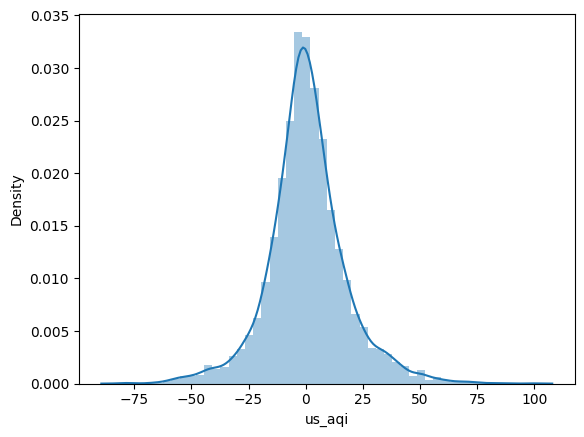

In [11]:
sns.distplot(y_test - y_pred)

In [12]:
import joblib

joblib.dump(knn, '../models/knn_regressor.joblib')

['../models/knn_regressor.joblib']

In [13]:
model = joblib.load("../models/knn_regressor.joblib")
y_val_pred = model.predict(X_val)

In [14]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

# 1. Mean Squared Error (MSE)
mse = mean_squared_error(y_val, y_val_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# 2. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# 3. R-squared (R²)
r2 = r2_score(y_val, y_val_pred)
print(f"R-squared (R²): {r2:.2f}")

# 4. Mean Absolute Error (MAE) - NEW
mae = mean_absolute_error(y_val, y_val_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# 5. Mean Absolute Percentage Error (MAPE) - NEW
mape = mean_absolute_percentage_error(y_val, y_val_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}") # Formats as a percentage

Mean Squared Error (MSE): 292.31
Root Mean Squared Error (RMSE): 17.10
R-squared (R²): 0.87
Mean Absolute Error (MAE): 12.19
Mean Absolute Percentage Error (MAPE): 15.03%
